# Linear Algebra via Examples

We demonstrate a few important LA concepts via examples. 


## Eigenvalues and Eigenvectors



In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [97]:
M = np.mat("3 -2; 1 0")
w, V = np.linalg.eig(M)

In [98]:
w

array([ 2.,  1.])

In [99]:
V

matrix([[ 0.89442719,  0.70710678],
        [ 0.4472136 ,  0.70710678]])

Verify the property that $$\mathbf{M} \mathbf{v} = \lambda \mathbf{v} $$

In [100]:
V[:, 0]

matrix([[ 0.89442719],
        [ 0.4472136 ]])

In [101]:
3 * V[:, 0]

matrix([[ 2.68328157],
        [ 1.34164079]])

In [102]:
for i in range(2):
    print('i = {}'.format(i+1))
    print('Left  = ', (M @ V[:, i]).reshape(1,2))
    print('Right = ', (w[i] * V[:, i]).reshape(1,2))

i = 1
Left  =  [[ 1.78885438  0.89442719]]
Right =  [[ 1.78885438  0.89442719]]
i = 2
Left  =  [[ 0.70710678  0.70710678]]
Right =  [[ 0.70710678  0.70710678]]


## Impact to basis vectors



In [103]:
U = np.mat("1 0; 0 1")
V = M @ U
V

matrix([[ 3, -2],
        [ 1,  0]])

In [104]:
U2 = np.hstack([np.array([i-1, j-1]).reshape(2,1) for i in range(3) for j in range(3)])
U2

array([[-1, -1, -1,  0,  0,  0,  1,  1,  1],
       [-1,  0,  1, -1,  0,  1, -1,  0,  1]])

In [105]:
V2 = M @ U2
V2

matrix([[-1, -3, -5,  2,  0, -2,  5,  3,  1],
        [-1, -1, -1,  0,  0,  0,  1,  1,  1]])

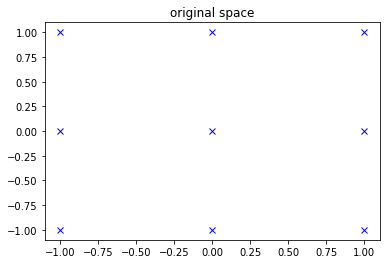

In [106]:
plt.plot(U2[0,:], U2[1,:], 'bx')
plt.title('original space')
plt.draw()
plt.show()

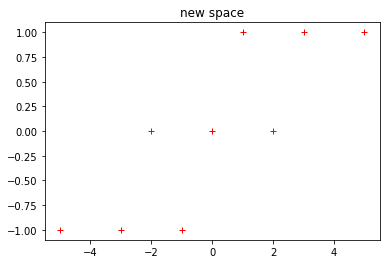

In [107]:
plt.plot(V2[0,:], V2[1,:], 'r+')
plt.title('new space')
plt.draw()
plt.show()

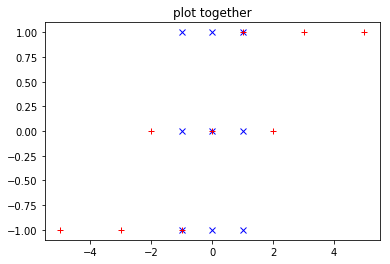

In [108]:
plt.plot(U2[0,:], U2[1,:], 'bx')
plt.plot(V2[0,:], V2[1,:], 'r+')
plt.title('plot together')
plt.draw()
plt.show()

With some more efforts, one can draw the original coordinate systems and the transformed one in a more visual way. This will hopefully strengthen the idea that a matrix multiplication represents a **linear transformation**.

## SVD

In [109]:
from scipy import linalg

In [110]:
A = np.array([ [5, 3], [0, -1], [12, 1], [4, 2] ])
A

array([[ 5,  3],
       [ 0, -1],
       [12,  1],
       [ 4,  2]])

We only do a reduced SVD: $$\mathbf{A} = \mathbf{U} \mathbf{S} \mathbf{V}^{\top}, $$ 
so that $\mathbf{U}$ is of the **same** shape as $\mathbf{A}$. 

In [111]:
U, s, Vt = linalg.svd(A, full_matrices=False)
S = np.diag(s)
V = Vt.T

In [112]:
U

array([[-0.39607852,  0.69414082],
       [ 0.01400816, -0.34519358],
       [-0.86373785, -0.47426224],
       [-0.31125955,  0.41723523]])

In [113]:
s

array([ 13.8536595 ,   2.84185124])

In [114]:
S

array([[ 13.8536595 ,   0.        ],
       [  0.        ,   2.84185124]])

In [115]:
Vt

array([[-0.98098881, -0.1940643 ],
       [-0.1940643 ,  0.98098881]])

In [116]:
V

array([[-0.98098881, -0.1940643 ],
       [-0.1940643 ,  0.98098881]])

We demonstrate a few useful properties of SVD: 

* (1) Exact Recovery

In [117]:
print(U.shape, S.shape, Vt.shape)

(4, 2) (2, 2) (2, 2)


In [118]:
reconA = np.round(U @ S @ Vt, 5)
reconA

array([[  5.,   3.],
       [  0.,  -1.],
       [ 12.,   1.],
       [  4.,   2.]])

* (2) Approximation

Another view of SVD is to decompose the original matrix into a sum of rank-1 matrices of decreasing "importance", i.e., 
$$
    \mathbf{A} = \sum_{i} {\sigma_i} \left( \mathbf{U}_i \otimes \mathbf{V}_i \right), 
$$
where $\otimes$ is the vector outer product, i.e., 
$$
\mathbf{u} \otimes \mathbf{v} = \mathbf{u} \otimes \mathbf{v}^{\top}
$$

In the following, we will approximate $\mathbf{A}$ by only one summand. 

In [121]:
U1 = U[:, 0]
U1

array([-0.39607852,  0.01400816, -0.86373785, -0.31125955])

In [127]:
s1 = s[0]
s1

13.853659500444321

In [125]:
Vt1 = Vt[0, :]
Vt1

array([-0.98098881, -0.1940643 ])

In [129]:
reconA1 = np.round(s1 * np.outer(U1, Vt1), 5)
reconA1

array([[  5.38282,   1.06486],
       [ -0.19037,  -0.03766],
       [ 11.73844,   2.32216],
       [  4.23011,   0.83682]])

In [130]:
A

array([[ 5,  3],
       [ 0, -1],
       [12,  1],
       [ 4,  2]])

* (3) Feature reduction

We manually creat a matrix $\mathbf{A}$ such that all but its last column is heavily correlated. 

In [159]:
a = np.random.rand(8)
b = np.random.rand(8)
sigma = 0.01
At = np.array( [a + sigma*np.random.randn(8) for _ in range(4)])
At = np.vstack((At, b))
A = At.T
print(a)
print(b)
print()
print(A)


[ 0.45990338  0.96384231  0.48995298  0.05508264  0.06889611  0.49147112
  0.04126475  0.85105499]
[ 0.30916353  0.86528242  0.46032828  0.48086873  0.83216986  0.59160002
  0.28097732  0.89340609]

[[ 0.44777444  0.46136587  0.45736377  0.43501112  0.30916353]
 [ 0.95876347  0.96037656  0.96619143  0.95710081  0.86528242]
 [ 0.49118062  0.48100437  0.51165972  0.49153326  0.46032828]
 [ 0.05763428  0.04672335  0.04842411  0.06212327  0.48086873]
 [ 0.06610218  0.07657449  0.0596183   0.05856341  0.83216986]
 [ 0.47279545  0.48355236  0.50616279  0.48448376  0.59160002]
 [ 0.03870542  0.0394704   0.04529884  0.04100914  0.28097732]
 [ 0.84777085  0.84486164  0.8449768   0.86221843  0.89340609]]


In [172]:
def approximate_one(A):
    U, s, Vt = linalg.svd(A, full_matrices=False)
    print('singular values are: \n', s) 
    S = np.diag(s)
    V = Vt.T
    # only 1 summand
    U1 = U[:, 0]
    s1 = s[0]
    Vt1 = Vt[0, :]
    A1 = s1 * np.outer(U1, Vt1)
    return A1

In [173]:
A1 = approximate_one(A)
A1

singular values are: 
 [ 3.44554418  0.82844891  0.03062468  0.02714454  0.01036905]


array([[ 0.41124606,  0.41233158,  0.41714834,  0.41314695,  0.44603497],
       [ 0.91990736,  0.92233552,  0.93311004,  0.92415941,  0.99772591],
       [ 0.47617328,  0.47743017,  0.48300741,  0.47837428,  0.51645464],
       [ 0.14129983,  0.14167281,  0.1433278 ,  0.14195296,  0.15325294],
       [ 0.22314108,  0.22373007,  0.22634364,  0.22417249,  0.24201745],
       [ 0.49799175,  0.49930623,  0.50513902,  0.5002936 ,  0.54011882],
       [ 0.09007498,  0.09031274,  0.09136776,  0.09049133,  0.09769478],
       [ 0.840482  ,  0.84270051,  0.85254476,  0.84436693,  0.91158166]])

In [174]:
print(A1 - A)

[[-0.03652838 -0.0490343  -0.04021542 -0.02186417  0.13687144]
 [-0.03885611 -0.03804104 -0.03308139 -0.03294139  0.13244349]
 [-0.01500734 -0.00357419 -0.02865231 -0.01315898  0.05612636]
 [ 0.08366556  0.09494946  0.09490369  0.07982969 -0.32761579]
 [ 0.15703889  0.14715559  0.16672534  0.16560909 -0.5901524 ]
 [ 0.0251963   0.01575387 -0.00102377  0.01580984 -0.05148121]
 [ 0.05136956  0.05084235  0.04606891  0.0494822  -0.18328254]
 [-0.00728885 -0.00216112  0.00756796 -0.01785149  0.01817556]]


In [175]:
[ np.sum( (A1-A)[:, i] ) for i in range(A.shape[1]) ]

[0.21958962603481635,
 0.21589060023747919,
 0.21229301357777805,
 0.2249147927967553,
 -0.80891509158094188]

As we can see and expect, the error is pretty small except in the last column. 

Notice that scipy has two version of SVD: `scipy.linalg.svd` and `scipy.sparse.linalg.svds`. See http://fa.bianp.net/blog/2012/singular-value-decomposition-in-scipy/ for a detailed discussion of the differences. 